In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('owid-covid-data.csv')


In [5]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [6]:
df['date'] = pd.to_datetime(df['date'])
countries = ['Kenya', 'United States', 'India', 'Brazil']
df_filtered = df[df['location'].isin(countries)].copy()


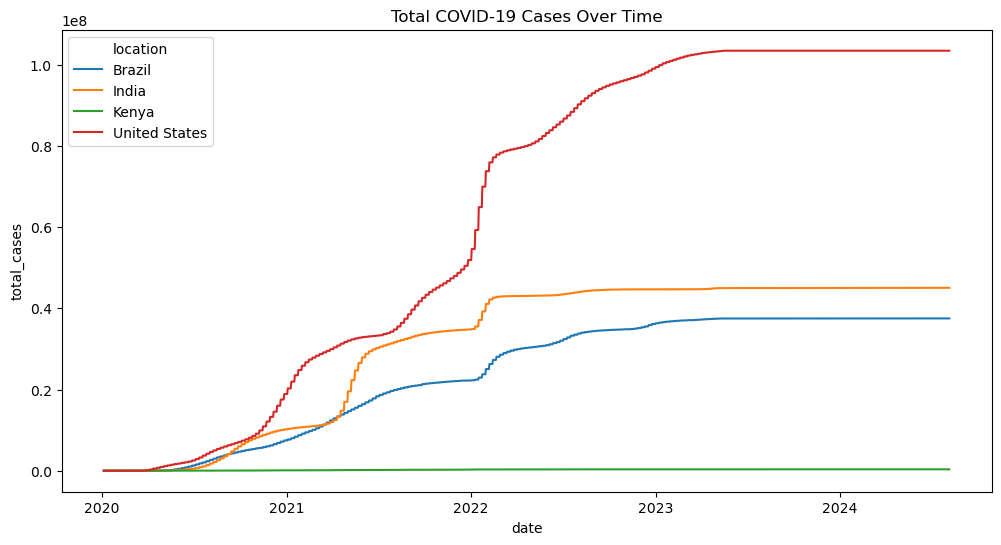

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.show()

In [9]:
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']


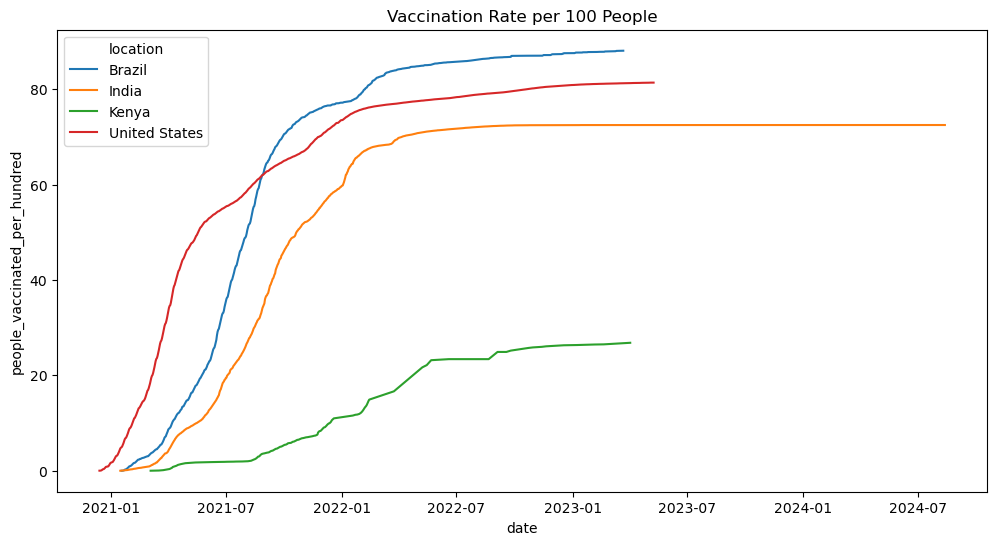

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x='date', y='people_vaccinated_per_hundred', hue='location')
plt.title('Vaccination Rate per 100 People')
plt.show()


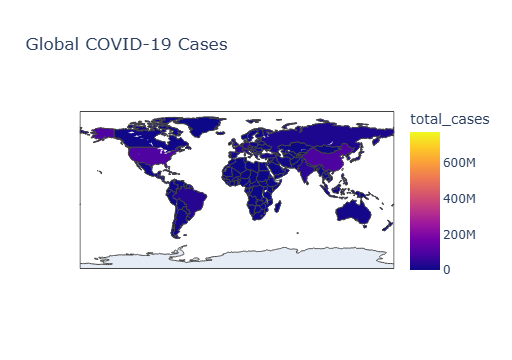

In [13]:
import plotly.express as px


latest = df.sort_values('date').groupby('location').last().reset_index()

fig = px.choropleth(latest, 
                    locations="location",
                    locationmode='country names',
                    color="total_cases",
                    hover_name="location",
                    title="Global COVID-19 Cases")
fig.show()

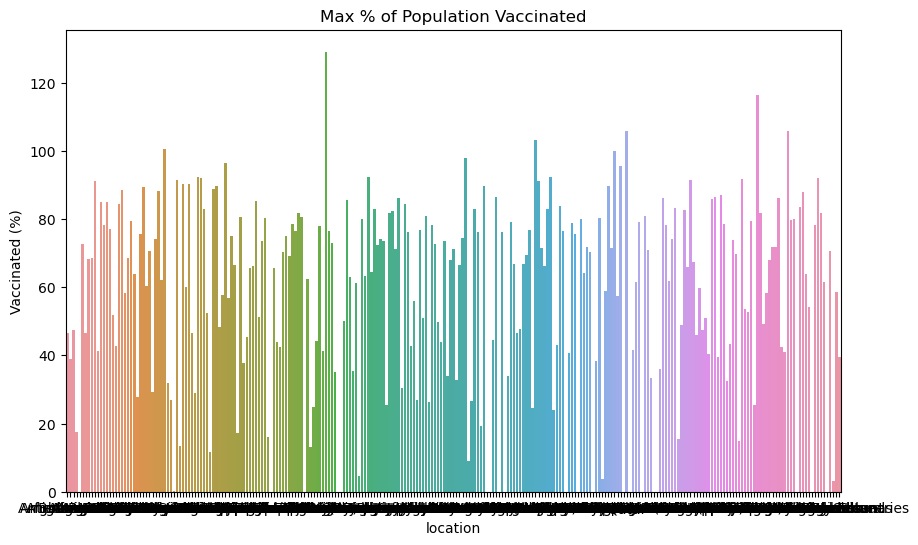

In [14]:
df['pct_vaccinated'] = (df['people_vaccinated'] / df['population']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=df.groupby('location')['pct_vaccinated'].max().reset_index(), 
            x='location', y='pct_vaccinated')
plt.title("Max % of Population Vaccinated")
plt.ylabel("Vaccinated (%)")
plt.show()

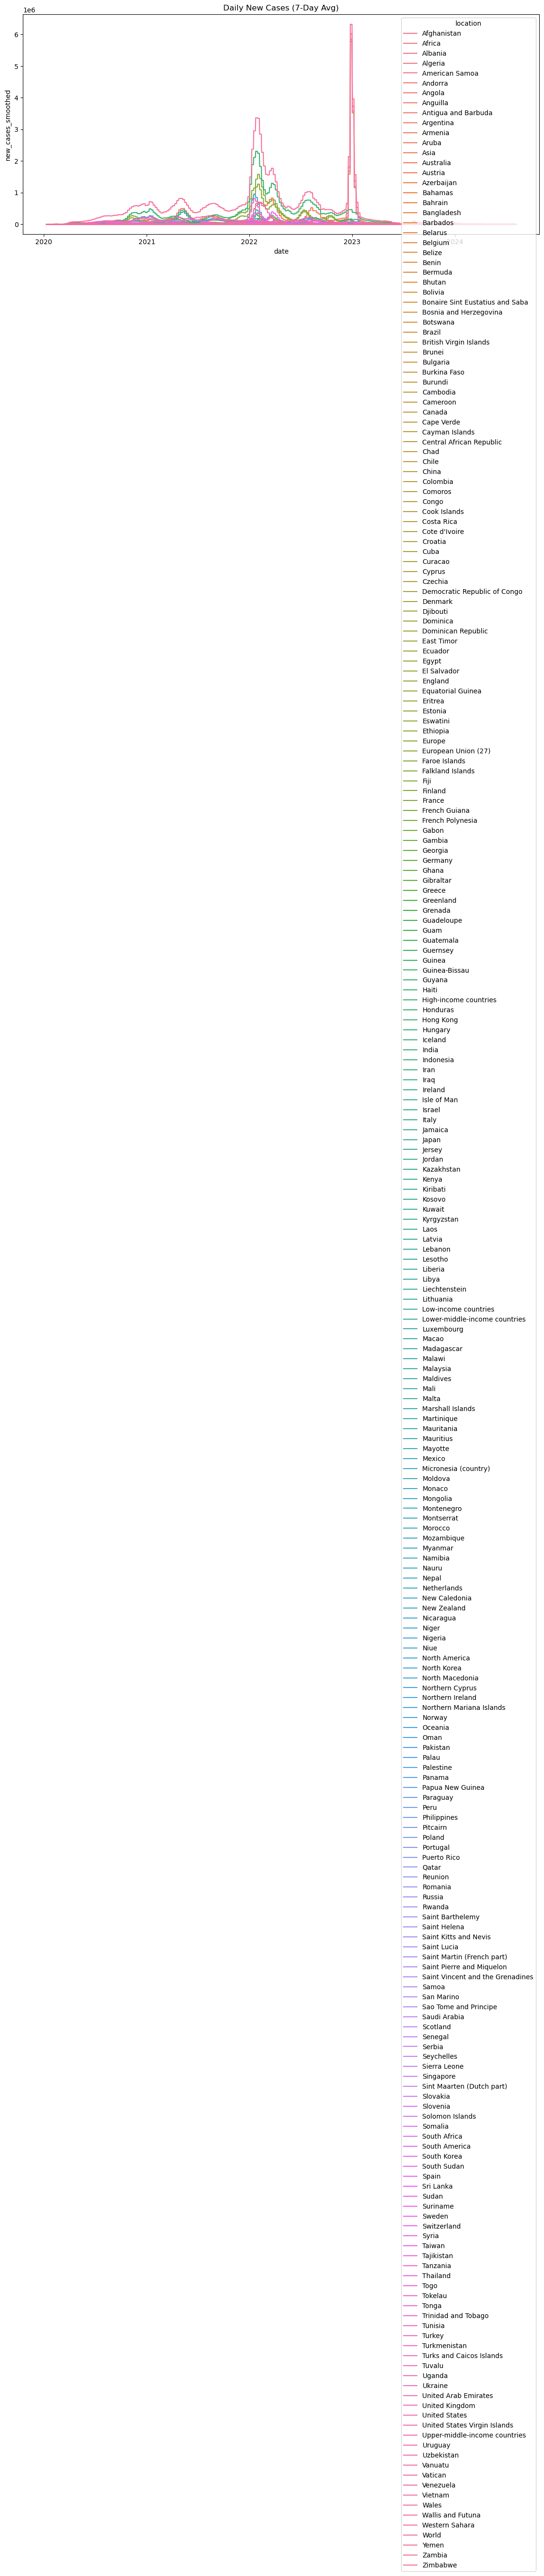

In [17]:
df['new_cases_smoothed'] = df.groupby('location')['new_cases'].transform(lambda x: x.rolling(7).mean())

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='new_cases_smoothed', hue='location')
plt.title("Daily New Cases (7-Day Avg)")
plt.show()